# Thông tin sinh viên

Bài tập 5

Tên sinh viên: Nguyễn Phương Tùng

MSSV: 21520524






# Import thư viện

In [ ]:
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

from skimage import feature
from bidict import bidict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Kết nối Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Đường dẫn đến thư mục chứa dữ liệu trong Google Drive
data_path = '/content/drive/MyDrive/CS231.O22.1/Baitap/Baitap5/images'

# Các hàm

In [ ]:
def drawHist(x):
    hist = cv.calcHist([x], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.legend(('histogram'), loc='upper left')
    plt.show()

In [ ]:
def globalThresholding(img, thres=127):
    img_rst = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img_rst[i][j] < thres:
                img_rst[i][j] = 255
            else:
                img_rst[i][j] = 0
    return img_rst

In [ ]:
def adaptiveThresholding(f, nrow, ncol):
    g = f.copy()
    r = int(f.shape[0] / nrow)
    c = int(f.shape[1] / ncol)
    for i in range(int(nrow)):
        for j in range(int(ncol)):
            x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
            cv2_imshow(x)
            drawHist(x)
            # You can specify a threshold here, for simplicity, I'm using np.average
            t = int(np.average(x))
            print(f"Threshold for block ({i},{j}): {t}")
            g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
    return g

# Load hình ảnh

In [ ]:
# Load images
images = ['particles.bmp', 'Phandoan01.jpg', 'wdg2.jpg', 'rice.png', 'wdg3.jpg']
loaded_images = {img: cv.imread(f"{data_path}/{img}", cv.IMREAD_GRAYSCALE) for img in images}

# Yêu cầu 1

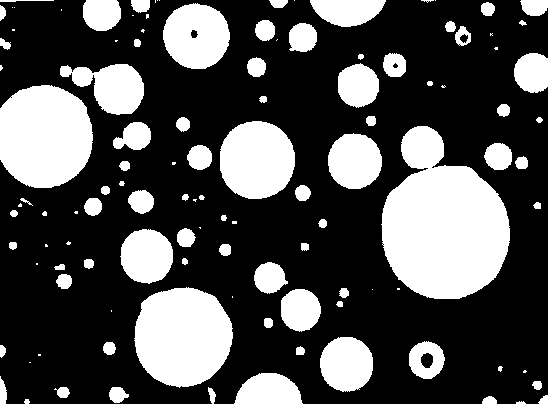

In [ ]:
# Apply global thresholding
global_threshold = 130
for img_name in ['particles.bmp']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = globalThresholding(img, global_threshold)
        cv2_imshow(result_img)
    else:
        print(f"Failed to load {img_name}")

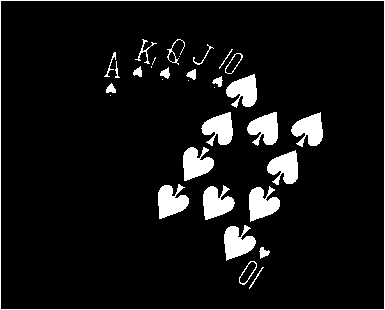

In [ ]:
# Apply global thresholding
global_threshold = 70
for img_name in ['Phandoan01.jpg']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = globalThresholding(img, global_threshold)
        cv2_imshow(result_img)
    else:
        print(f"Failed to load {img_name}")

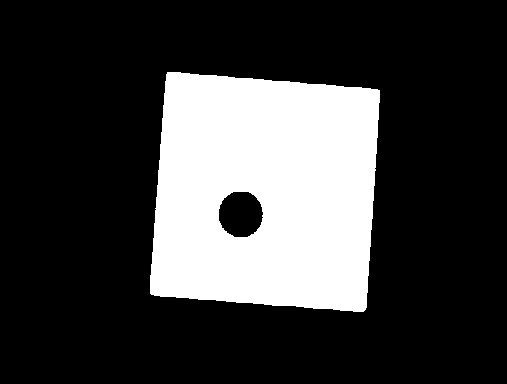

In [ ]:
# Apply global thresholding
global_threshold = 120
for img_name in ['wdg2.jpg']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = globalThresholding(img, global_threshold)
        cv2_imshow(result_img)
    else:
        print(f"Failed to load {img_name}")

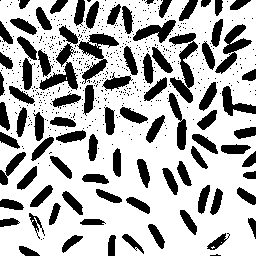

In [ ]:
# Apply global thresholding
global_threshold = 120
for img_name in [ 'rice.png']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = globalThresholding(img, global_threshold)
        cv2_imshow(result_img)
    else:
        print(f"Failed to load {img_name}")

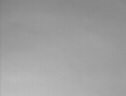

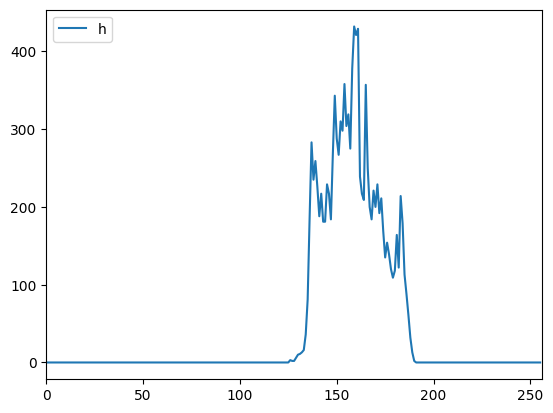

Threshold for block (0,0): 158


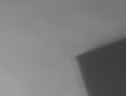

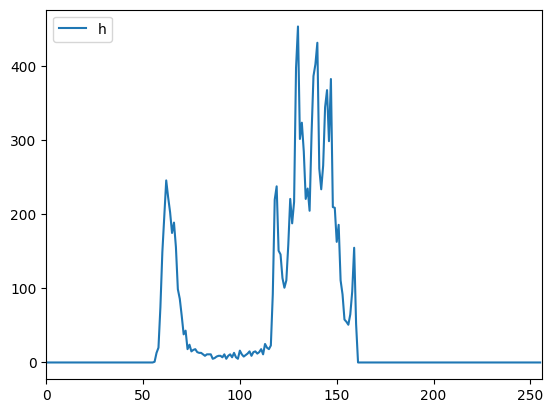

Threshold for block (0,1): 123


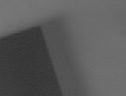

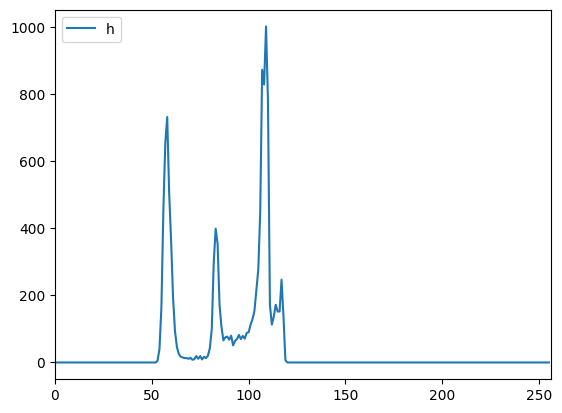

Threshold for block (0,2): 90


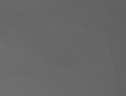

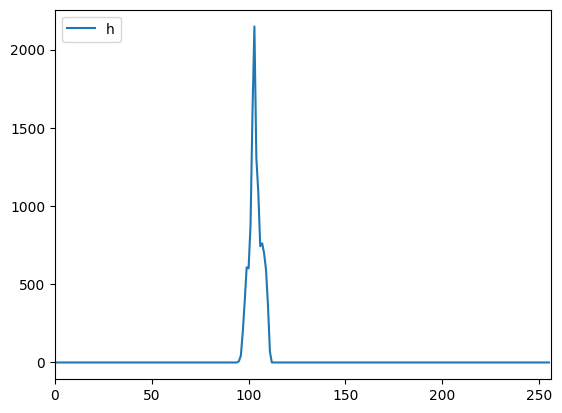

Threshold for block (0,3): 103


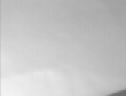

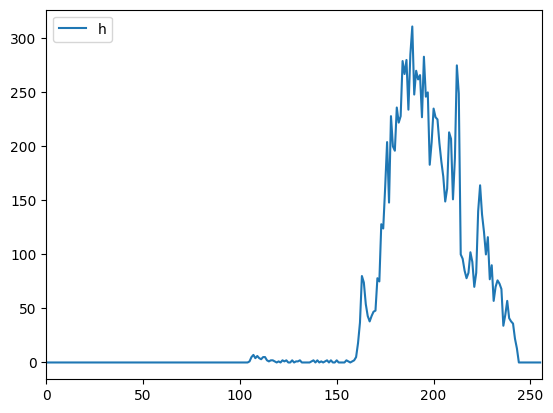

Threshold for block (1,0): 197


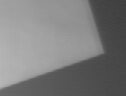

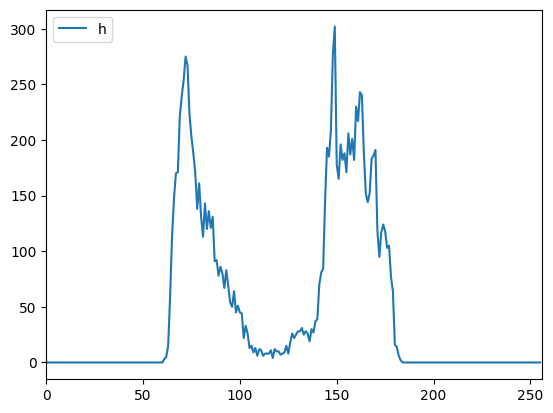

Threshold for block (1,1): 124


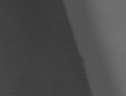

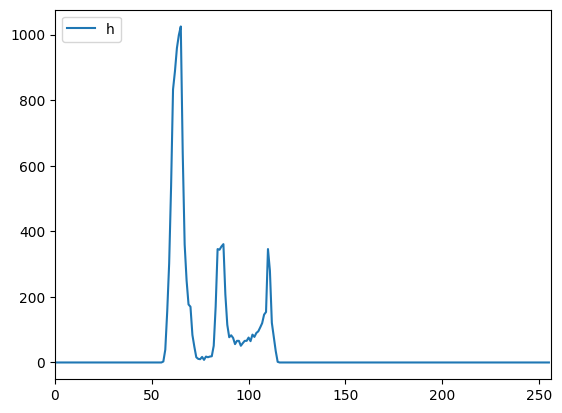

Threshold for block (1,2): 75


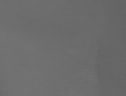

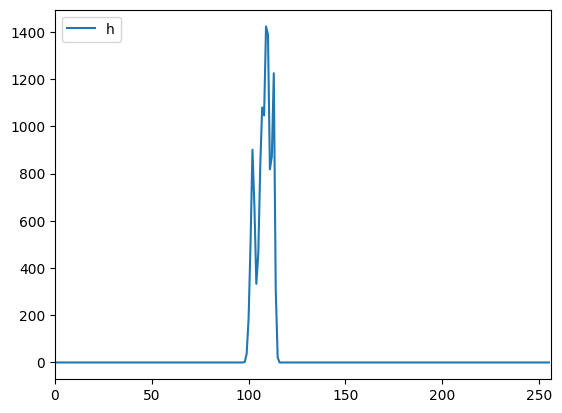

Threshold for block (1,3): 107


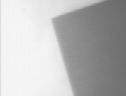

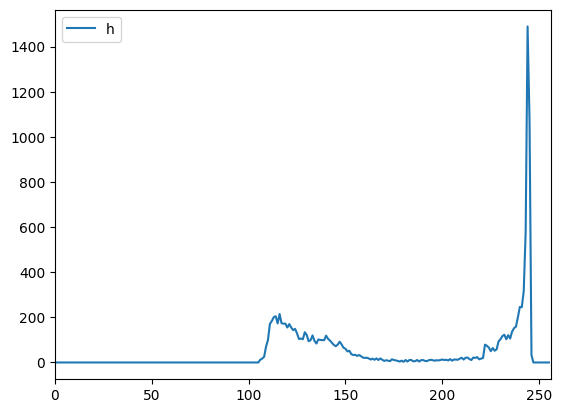

Threshold for block (2,0): 185


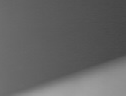

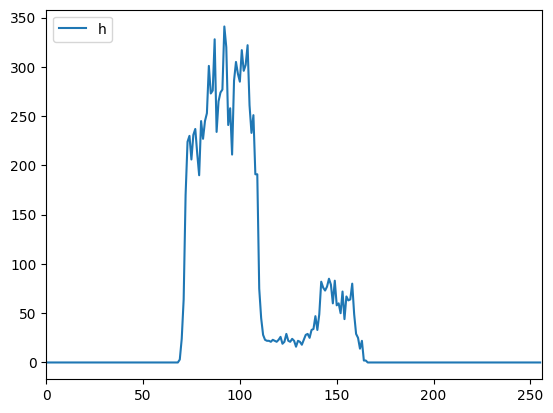

Threshold for block (2,1): 99


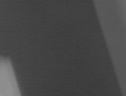

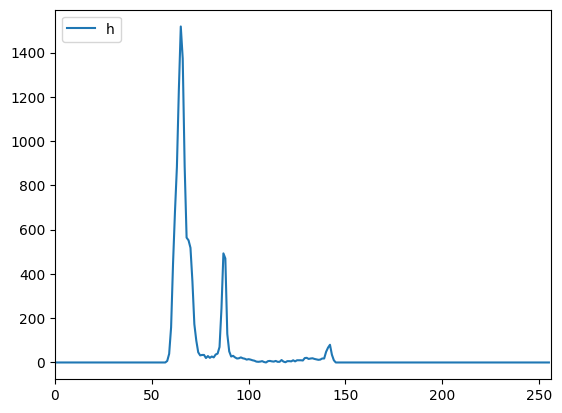

Threshold for block (2,2): 72


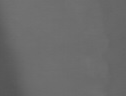

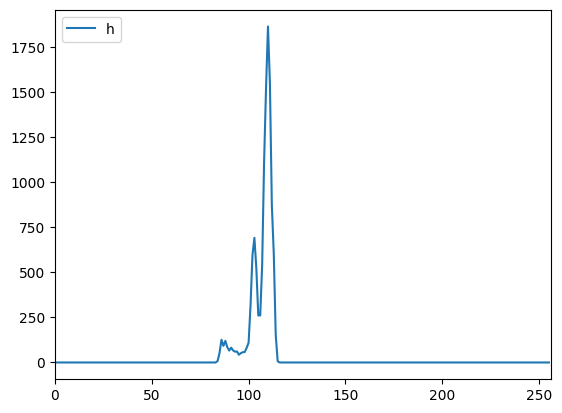

Threshold for block (2,3): 106


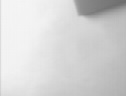

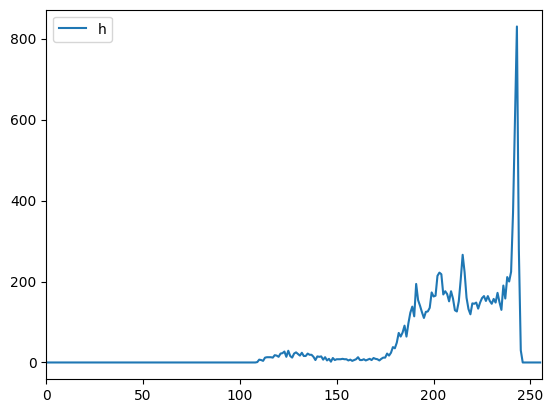

Threshold for block (3,0): 212


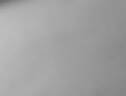

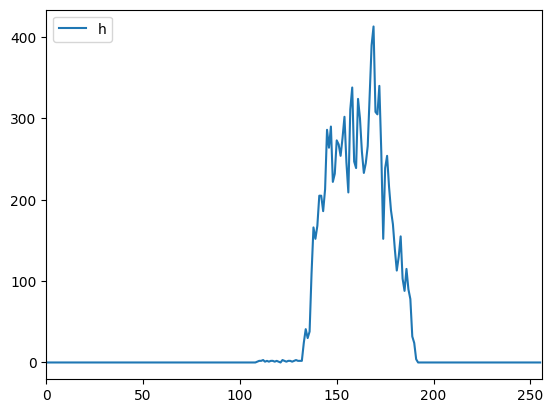

Threshold for block (3,1): 160


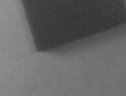

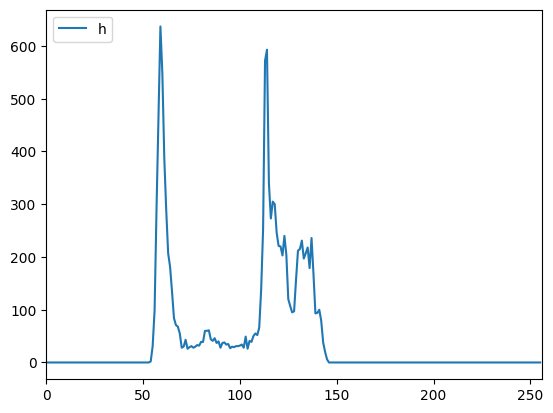

Threshold for block (3,2): 100


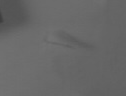

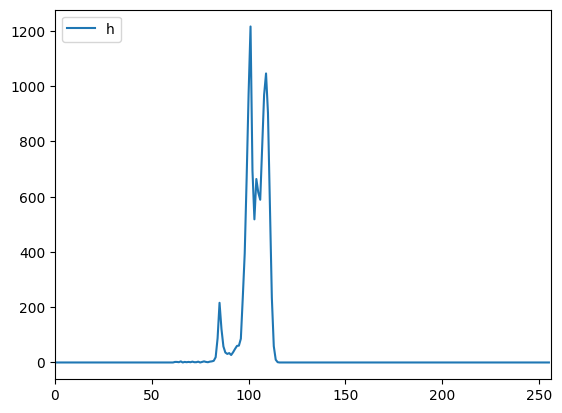

Threshold for block (3,3): 103


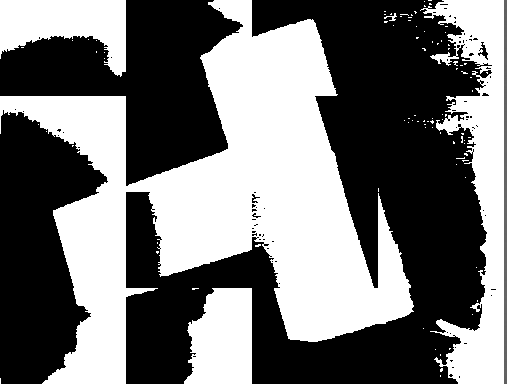

In [ ]:
# Apply adaptive thresholding
img_name = 'wdg3.jpg'
img = loaded_images[img_name]
if img is not None:
    nrow, ncol = 4, 4  # Example values, adjust as needed
    result_img = adaptiveThresholding(img, nrow, ncol)
    cv2_imshow(result_img)
else:
    print(f"Failed to load {img_name}")

# Yêu cầu 2

## RGB

In [ ]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans

In [ ]:
def Kmeans(img, n_clusters=6):
    nrow, ncol, nchl = img.shape
    g = img.reshape(nrow*ncol, nchl)
    k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
    t = k_means.cluster_centers_[k_means.labels_]
    img_res = t.reshape(nrow, ncol, nchl)
    return img_res

In [ ]:
def Kmeans2(img, n_clusters=6):
    img_tmp = img.copy()
    nrow, ncol, nchl = img.shape

    g = []
    for y in range(nrow):
        for x in range(ncol):
            tmp = [img_tmp[y, x][0], img_tmp[y, x][1], img_tmp[y, x][2], x, y]
            g.append(tmp)

    k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g)
    arrcolor = np.random.rand(20, 3) * 255
    t = arrcolor[k_means.labels_]

    img_res = img_tmp
    i = 0
    for y in range(nrow):
        for x in range(ncol):
            img_res[y, x] = t[i][0:3]
            i += 1

    return img_res

In [ ]:
images = ['vegetables.jpg', 'hand.jpg', 'thuoc.jpg']
loaded_images = {img: cv.imread(os.path.join(data_path, img)) for img in images}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


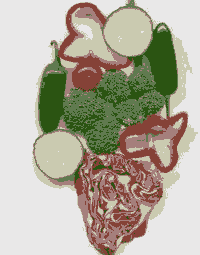

In [ ]:
for img_name in ['vegetables.jpg']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = Kmeans(img, n_clusters=6)
        cv2_imshow(result_img.astype(np.uint8))
    else:
        print(f"Failed to load {img_name}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


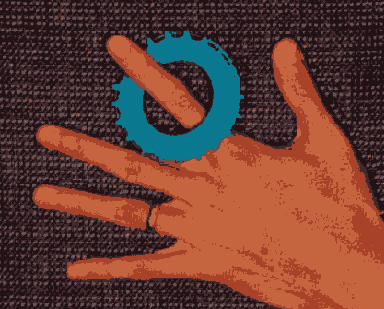

In [ ]:
for img_name in [ 'hand.jpg']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = Kmeans(img, n_clusters=6)
        cv2_imshow(result_img.astype(np.uint8))
    else:
        print(f"Failed to load {img_name}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


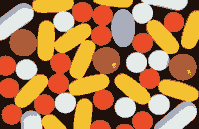

In [ ]:
for img_name in [ 'thuoc.jpg']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = Kmeans(img, n_clusters=6)
        cv2_imshow(result_img.astype(np.uint8))
    else:
        print(f"Failed to load {img_name}")

## RGBXY

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


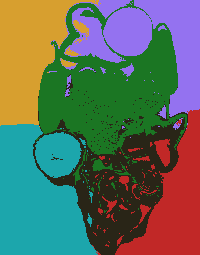

In [ ]:
for img_name in ['vegetables.jpg']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = Kmeans2(img, n_clusters=6)
        cv2_imshow(result_img.astype(np.uint8))
    else:
        print(f"Failed to load {img_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


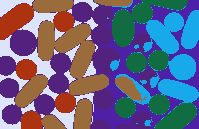

In [ ]:
for img_name in [ 'thuoc.jpg']:
    img = loaded_images[img_name]
    if img is not None:
        result_img = Kmeans2(img, n_clusters=7)
        cv2_imshow(result_img.astype(np.uint8))
    else:
        print(f"Failed to load {img_name}")
